In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'AppleGothic' # For Mac
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score , recall_score , confusion_matrix
from sklearn.metrics import accuracy_score # 정확도 함수
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
data = pd.read_csv("/Users/csb/Desktop/Project/넙치 머신러닝/0_양식어류 질병예측_221207/20-21-22-23 통합본 null 행제거.csv")
#data = pd.read_csv("/Users/csb/Desktop/Project/넙치 머신러닝/0_양식어류 질병예측_221207/20-21 전처리.csv")

In [4]:
#data1 = data[['수온', 'Condition factor', 'ALP', 'T P', 'Wgp2', 'Wgi3', 'Whkp2', 'Whki2-1', 'Wlr1', 'Wlr2-1', 'Wsi2','결과']]
#data1 = data[['사료급이량', '어체중(g)', 'Condition factor', '임상증상유무', 'T P', 'Wgp2', 'Whkr7', 'Whkp2', 'Whki2-1', 'Wlr1', 'Wlr2-1', 'Wsi2', '결과']]
data

월  일순환량   사료급이량  일평균폐사  백신접종여부     수온     DO    pH  ATP    세균수  전장(cm)  \
0     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    20.8   
1     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    20.2   
2     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    19.8   
3     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    19.1   
4     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    18.5   
5     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    21.9   
6     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    22.8   
7     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    20.3   
8     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    23.0   
9     5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    20.7   
10    5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    21.2   
11    5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    19.6   
12    5    20  0.0240   20.0       0  17.57   4.70  7.42  185   3800    20.1   
13    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    29.5   
14    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    29.1   
15    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    29.5   
16    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    32.0   
17    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    29.9   
18    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    32.4   
19    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    33.9   
20    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    37.4   
21    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    33.0   
22    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    32.0   
23    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    33.0   
24    5    20  0.0870    0.5       0  16.89   7.00  6.98  178   6700    30.1   
25    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    32.0   
26    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    32.4   
27    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    30.2   
28    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    31.8   
29    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    34.1   
30    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    31.2   
31    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    30.9   
32    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    30.8   
33    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    32.1   
34    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    30.0   
35    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    29.2   
36    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    30.7   
37    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    31.2   
38    5    24  0.0220    5.0       1  15.97   8.00  7.91  112   7900    32.3   
39    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    31.0   
40    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    26.8   
41    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    25.9   
42    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    27.0   
43    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    27.8   
44    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    26.4   
45    5     8  0.0490   10.0       1  17.38   9.30  7.65  132   8400    25.1   
46    6    20  0.0270   20.0       0  19.30   6.70  7.24  910   5400    18.1   
47    6    20  0.0270   20.0       0  19.30   6.70  7.24  910   5400    17.2   
48    6    20  0.0270   20.0       0  19.30   6.70  7.24  910   5400    21.0   
49    

In [5]:
# features/target, train/test dataset 분리

feature_columns = list(data.columns.difference(['결과']))
X = data[feature_columns]
y = data['결과']
X

ALB  ALP  ALT  ATP   BUN  CHOL  CREA    Ca  Condition factor     DO  \
0     1.1  144   10  185   3.5   307  0.10  13.5             1.922   4.70   
1     1.3  177   10  185   1.6   310  0.10  14.3             1.862   4.70   
2     1.0  101   12  185   2.7   142  0.10  14.3             2.049   4.70   
3     1.2  103   10  185   2.3   320  0.20  13.7             2.030   4.70   
4     1.2  165   10  185   2.8   325  0.10  15.6             2.306   4.70   
5     1.4  109   12  185   2.6   246  0.30  14.5             1.521   4.70   
6     1.2  221   13  185   2.2   260  0.10  13.5             1.691   4.70   
7     1.1  271   12  185   1.9   294  0.10  14.9             1.982   4.70   
8     1.1   94   12  185   1.8   232  0.10  12.9             1.717   4.70   
9     1.3  151   12  185   2.4   285  0.10  13.8             1.755   4.70   
10    1.5  174   10  185   2.1   308  0.10  14.3             1.732   4.70   
11    1.2   59   12  185   5.7   135  0.20  14.8             1.743   4.70   
12    1.2  301   13  185   2.4   146  0.10  14.3             1.768   4.70   
13    1.5  198   18  178   2.6   361  0.10  14.6             2.015   7.00   
14    1.1  114   16  178   2.5   377  0.30  13.7             2.023   7.00   
15    1.3  233   13  178   4.0   276  0.30  13.9             1.910   7.00   
16    1.2  101   15  178   2.2   166  0.30  14.1             2.012   7.00   
17    1.2   82   10  178   2.1   188  0.20  13.5             2.332   7.00   
18    1.5  163   12  178   1.9   264  0.10  13.5             2.291   7.00   
19    1.5  319   24  178   2.7   234  0.40  13.6             1.775   7.00   
20    1.4  294   14  178   2.8   221  0.30  14.3             1.876   7.00   
21    1.2  232   18  178   2.0   356  0.20  13.6             1.524   7.00   
22    1.4  250   21  178   2.9   364  0.30  13.7             2.125   7.00   
23    1.5  304   27  178   3.0   333  0.40  15.2             1.873   7.00   
24    1.1  344   19  178   2.0   227  0.10  15.1             1.409   7.00   
25    1.0   91   13  112   2.6   262  0.10  12.1             1.661   8.00   
26    1.2  118   21  112   1.6   218  0.10  11.6             1.579   8.00   
27    1.0  212   23  112   2.3   214  0.10  12.7             1.401   8.00   
28    1.3  101   16  112   2.3   162  0.20  12.1             1.670   8.00   
29    1.4  142   42  112   4.2   192  0.20  11.5             1.577   8.00   
30    1.0  256   38  112   2.4   139  0.20  11.1             1.526   8.00   
31    1.1  190   32  112   4.0   147  0.10  11.6             1.686   8.00   
32    1.4  114   16  112   2.7   221  0.10  13.4             1.865   8.00   
33    1.3  165   49  112   2.2   300  0.10  11.9             1.800   8.00   
34    1.2   91   32  112   2.7   140  0.10  11.8             2.034   8.00   
35    1.2  190   34  112   2.4   251  0.10  12.2             1.745   8.00   
36    1.2  114   45  112   2.7   263  0.20  11.8             1.953   8.00   
37    1.3  278   67  112   2.3   209  0.40  13.2             1.424   8.00   
38    1.2  322   40  112   3.1   240  0.20  11.7             1.813   8.00   
39    1.6  188   10  132   2.3   313  0.10  13.8             1.805   9.30   
40    1.3  131   13  132   3.0   431  0.10  13.7             1.626   9.30   
41    1.4  126   15  132   3.7   450  0.10  15.0             1.821   9.30   
42    1.7  201   12  132   2.3   194  0.10  13.3             1.918   9.30   
43    1.5  116   13  132   2.4   299  0.10  13.3             2.208   9.30   
44    1.3   61   10  132   5.1   254  0.10  11.7             1.978   9.30   
45    1.3   64   10  132   4.0   133  0.10  11.4             1.981   9.30   
46    1.0  174   14  910   1.9   130  0.10  14.1             1.888   6.70   
47    1.1  168   23  910   2.6   172  0.10  11.8             2.148   6.70   
48    1.2  101   19  910   2.8   130  0.10  12.1             1.520   6.70   
49    1.3  116   11  910   1.9   171  0.10  12.1             1.575   6.70   
50    1.2   94   19  910   2.8   165  0.10  12.4             1.963   6.70   
51

In [ ]:
from sklearn.preprocessing import StandardScaler
# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(X)
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size = 0.1, random_state = 10) # 학습데이터와 평가데이터의 비율을 8:2 로 분할| 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

In [ ]:
train_x

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.1, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할| 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(535, 101) (60, 101) (535,) (60,)


In [ ]:
param_grid = [
    {'max_features': [3,4,5,6,7,9,11]}]

forest = RandomForestClassifier(random_state=1234)

grid_search = GridSearchCV(forest, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(train_x, train_y)

In [ ]:
print('최적 하이퍼 파라미터: ', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수

forest = RandomForestClassifier(random_state = 1234,
                               max_features = n_features,
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
forest.fit(train_x, train_y)

y_pred = forest.predict(test_x)

print('훈련세트 정확도: {:.3f}'.format(forest.score(train_x, train_y)))
print('테스트세트 정확도: {:.3f}'.format(forest.score(test_x, test_y)))

훈련세트 정확도: 0.847
테스트세트 정확도: 0.767


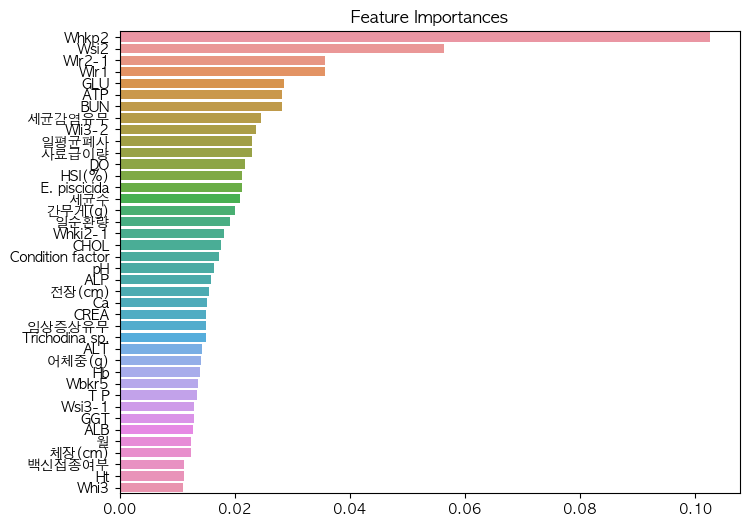

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:40]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [7]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시


In [8]:
def feature_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, feature_min, feature_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree for n_tree in range(feature_min, feature_max)]

    for v_n_features in para_n_tree:
        model = algorithm(max_features = v_n_features, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_features': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of feature", "max_feature")
    print(round(df_score_n, 4))


In [9]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max,n_features):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators,
                          max_features = n_features,
                          random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))


In [10]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max,n_features, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              max_features = n_features,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [11]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max,n_features, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_features = n_features,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [12]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max,n_features, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                              max_features = n_features,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

     n_features  TrainScore  TestScore
0             1         1.0     0.8000
1             2         1.0     0.7833
2             3         1.0     0.7833
3             4         1.0     0.8000
4             5         1.0     0.7833
5             6         1.0     0.7667
6             7         1.0     0.7333
7             8         1.0     0.7833
8             9         1.0     0.7333
9            10         1.0     0.7333
10           11         1.0     0.7333
11           12         1.0     0.7333
12           13         1.0     0.7500
13           14         1.0     0.7167
14           15         1.0     0.7167
15           16         1.0     0.7333
16           17         1.0     0.7167
17           18         1.0     0.7500
18           19         1.0     0.7000
19           20         1.0     0.6833
20           21         1.0     0.7167
21           22         1.0     0.7167
22           23         1.0     0.7500
23           24         1.0     0.7333
24           25         1

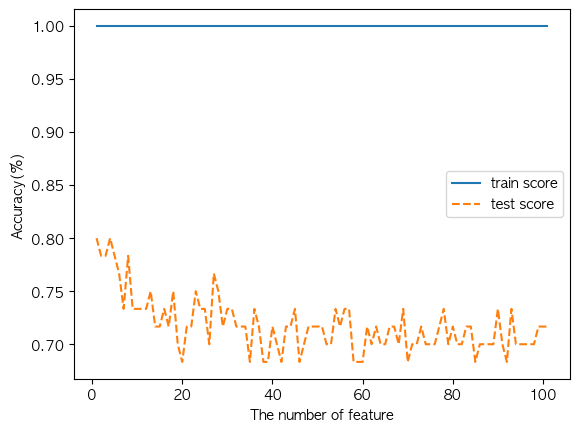

In [13]:
feature_min = 1
feature_max = 102
feature_estimator(RandomForestClassifier, 'RF', 
                 train_x, train_y, test_x, test_y,
                 feature_min, feature_max)

In [7]:
n_features = 4

    n_estimators  TrainScore  TestScore
0              5      0.9607     0.7000
1             10      0.9850     0.7500
2             15      0.9925     0.7833
3             20      0.9981     0.8167
4             25      0.9981     0.7667
5             30      1.0000     0.7667
6             35      0.9981     0.7667
7             40      0.9981     0.7500
8             45      0.9981     0.7500
9             50      1.0000     0.7500
10            55      1.0000     0.7667
11            60      1.0000     0.7500
12            65      1.0000     0.7500
13            70      1.0000     0.7667
14            75      1.0000     0.7833
15            80      1.0000     0.8000
16            85      1.0000     0.7833
17            90      1.0000     0.7833
18            95      1.0000     0.7833
19           100      1.0000     0.8000
20           105      1.0000     0.8000
21           110      1.0000     0.8000
22           115      1.0000     0.8000
23           120      1.0000     0.8000


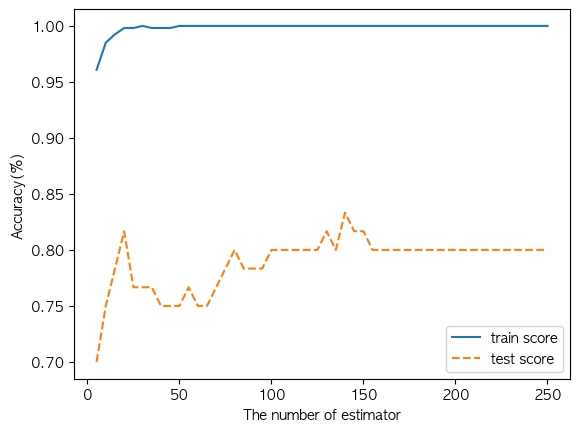

In [15]:
n_estimator_min = 1
n_estimator_max = 51
optimi_estimator(RandomForestClassifier, 'RF', 
                 train_x, train_y, test_x, test_y, 
                 n_estimator_min, n_estimator_max,n_features)

In [8]:
n_estimator = 140

    depth  TrainScore  TestScore
0       1      0.6822     0.6667
1       2      0.7327     0.7167
2       3      0.7570     0.7167
3       4      0.7738     0.7333
4       5      0.8150     0.7333
5       6      0.8654     0.7500
6       7      0.9196     0.7667
7       8      0.9514     0.7667
8       9      0.9720     0.7833
9      10      0.9869     0.7500
10     11      0.9888     0.7667
11     12      0.9981     0.7500
12     13      1.0000     0.8167
13     14      1.0000     0.7833
14     15      1.0000     0.7333
15     16      1.0000     0.7833
16     17      1.0000     0.7833
17     18      1.0000     0.8167
18     19      1.0000     0.8167
19     20      1.0000     0.7833


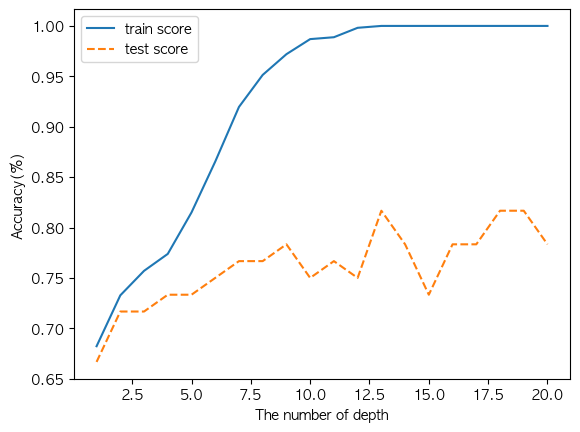

In [17]:
depth_min = 1
depth_max = 21
optimi_maxdepth(RandomForestClassifier, 'RF',
                train_x, train_y, test_x, test_y, 
                depth_min, depth_max,n_features, n_estimator)

In [9]:
n_depth=13

    min_samples_split  TrainScore  TestScore
0                   2      1.0000     0.8167
1                   4      0.9850     0.7500
2                   6      0.9794     0.7833
3                   8      0.9589     0.7667
4                  10      0.9551     0.7667
5                  12      0.9402     0.7500
6                  14      0.9234     0.7500
7                  16      0.9140     0.7333
8                  18      0.9084     0.7667
9                  20      0.8972     0.7500
10                 22      0.8897     0.7833
11                 24      0.8804     0.7833
12                 26      0.8822     0.7833
13                 28      0.8654     0.7667
14                 30      0.8654     0.7833
15                 32      0.8579     0.7833
16                 34      0.8505     0.7667
17                 36      0.8449     0.8167
18                 38      0.8430     0.7833
19                 40      0.8355     0.7667
20                 42      0.8336     0.8000
21        

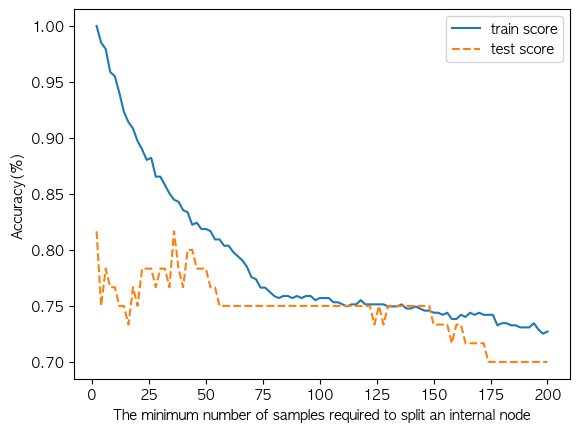

In [19]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (RandomForestClassifier, 'RF',
                train_x, train_y, test_x, test_y,
                 n_split_min, n_split_max,n_features, n_estimator, n_depth)

In [10]:
n_split = 2

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9720     0.7667
1                  4      0.9028     0.7667
2                  6      0.8598     0.7667
3                  8      0.8430     0.7833
4                 10      0.8318     0.7333
5                 12      0.8112     0.7167
6                 14      0.7850     0.7167
7                 16      0.7776     0.7333
8                 18      0.7570     0.7333
9                 20      0.7533     0.7333
10                22      0.7495     0.7333
11                24      0.7514     0.7333
12                26      0.7495     0.7333
13                28      0.7533     0.7333
14                30      0.7514     0.7333
15                32      0.7477     0.7333
16                34      0.7477     0.7333
17                36      0.7458     0.7333
18                38      0.7383     0.7333
19                40      0.7346     0.7333
20                42      0.7327     0.7333
21                44      0.7271

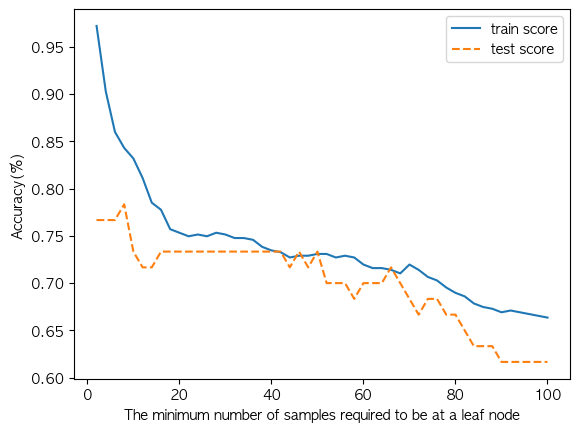

In [21]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(RandomForestClassifier, 'RF',
                train_x, train_y, test_x, test_y, 
               n_leaf_min, n_leaf_max,n_features, n_estimator, n_depth, n_split)

In [11]:
n_leaf=8

In [ ]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_features, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          max_features = n_features,
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234,
                          max_features = n_features,
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = '/Users/csb/Desktop/'
    model_filename = 'wine_classification_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test, y_pred,average= "macro")
    recall = recall_score(y_test, y_pred,average= "macro")
    F1score = f1_score(y_test, y_pred,average= "macro")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision:.3f}") # 정밀도
    print(f"Recall: {recall:.3f}") # 재현율
    print(f"F1-score: {F1score:.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         test_x, test_y,
                         include_values = True,
                         display_labels = ['정상', '주의','질병'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('/Users/csb/Desktop/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름

In [ ]:
model_final(RandomForestClassifier, 'RF', X.columns,
            train_x, train_y, test_x, test_y,
            n_features,n_estimator, n_depth, n_split, n_leaf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate

forest = RandomForestClassifier(random_state = 1234,
                          max_features = n_features,
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split,
                          max_depth = n_depth)

loocv = LeaveOneOut()
score = cross_val_score(forest, x_scaled, y, cv = loocv,scoring='accuracy')
#score = cross_validate(forest, X, y, cv = loocv, scoring=['accuracy','precision_macro', 'recall_macro', 'f1_macro'])

print("\n## 교차 검증 횟수 : ", len(score))
print("교차 검증 점수 평균 : {:.3f}".format(score.mean()))

In [ ]:
accuracy = score['test_accuracy']
precision = score['test_precision_macro']
recall = score['test_recall_macro']
f1 = score['test_f1_macro']
print("교차 검증 점수 평균 : {:.3f}".format(accuracy.mean()))
print("Precision : {:.3f}".format(precision.mean()))
print("Recall : {:.3f}".format(recall.mean()))
print("F1 : {:.3f}".format(f1.mean()))
